In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,AdaBoostClassifier,RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
rs = 0

In [2]:
#To prevent warnings being displayed
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore") #ignoring the warnings

In [3]:
#Splitting the dataset into train dataset and test dataset
data_df = pd.read_csv("data_df.csv")
data_df_features = data_df.drop(columns=["class","unique_id"]) #Extracting Features
data_df_class = data_df[["class"]] #Saving only Class labels

X_train, X_test, y_train, y_test = train_test_split(data_df_features, data_df_class, test_size=0.20, random_state=rs, stratify = data_df_class)

In [4]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred) #Computing the Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") #Initializing the Heatmap
    plt.xlabel("Predicted Labels") #Setting x label
    plt.ylabel("Actual Labels") #Setting y label
    plt.title("Confusion Matrix Obtained") #Setting the title
    plt.show(); #Showing the plot
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating F1-score value
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Precision value
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred),average='macro'),4) #Calculating Recall value
    print("F1-score obtained is ",f1_value) #Printing F1-score value
    print("Precision obtained is ",prec) #Printing Precision value
    print("Recall obtained is ",rec) #Printing Recall value
    print("Classification Report obtained is :")
    print(classification_report(y_test, y_pred))
    return [f1_value,prec,rec] #return f1-score, precision and recall

In [5]:
best_results_table = []

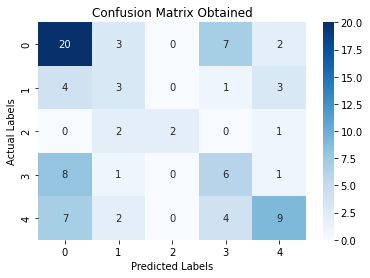

F1-score obtained is  0.4468
Precision obtained is  0.5363
Recall obtained is  0.4164
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        32
           1       0.27      0.27      0.27        11
           2       1.00      0.40      0.57         5
           3       0.33      0.38      0.35        16
           4       0.56      0.41      0.47        22

    accuracy                           0.47        86
   macro avg       0.54      0.42      0.45        86
weighted avg       0.49      0.47      0.46        86



In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(X_train,y_train)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(X_test)
dt_list = ["Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(y_test, dt_pca_pipeline_yPred,"Decision Tree - PCA"))
best_results_table.append(dt_list)

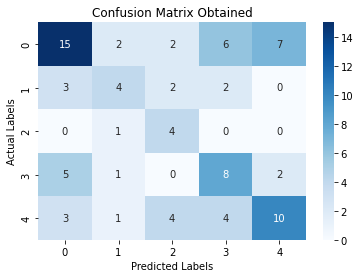

F1-score obtained is  0.464
Precision obtained is  0.4562
Recall obtained is  0.5174
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.44      0.36      0.40        11
           2       0.33      0.80      0.47         5
           3       0.40      0.50      0.44        16
           4       0.53      0.45      0.49        22

    accuracy                           0.48        86
   macro avg       0.46      0.52      0.46        86
weighted avg       0.50      0.48      0.48        86



In [7]:
knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])
knn_pca_pipeline.fit(X_train,y_train)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(X_test)
knn_list = ["KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(y_test, knn_pca_pipeline_yPred,"KNN - PCA"))
best_results_table.append(knn_list)

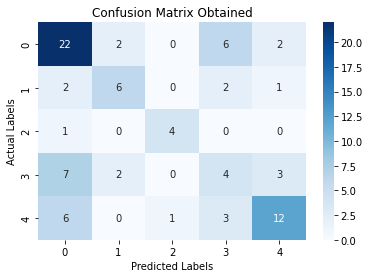

F1-score obtained is  0.5716
Precision obtained is  0.5825
Recall obtained is  0.5657
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        32
           1       0.60      0.55      0.57        11
           2       0.80      0.80      0.80         5
           3       0.27      0.25      0.26        16
           4       0.67      0.55      0.60        22

    accuracy                           0.56        86
   macro avg       0.58      0.57      0.57        86
weighted avg       0.56      0.56      0.55        86



In [8]:
rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])
rf_pca_pipeline.fit(X_train,y_train)
rf_pca_pipeline_yPred = rf_pca_pipeline.predict(X_test)
rf_list = ["RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA"]
rf_list.extend(print_metrics(y_test, rf_pca_pipeline_yPred,"RF - PCA"))
best_results_table.append(rf_list)

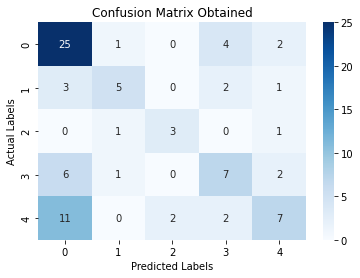

F1-score obtained is  0.5255
Precision obtained is  0.5571
Recall obtained is  0.5183
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        32
           1       0.62      0.45      0.53        11
           2       0.60      0.60      0.60         5
           3       0.47      0.44      0.45        16
           4       0.54      0.32      0.40        22

    accuracy                           0.55        86
   macro avg       0.56      0.52      0.53        86
weighted avg       0.55      0.55      0.53        86



In [9]:
svm = SVC(C=29.763514416313132, random_state=0)
pca = PCA(n_components=76,random_state=rs)

svm_pca_pipeline = Pipeline([('pca', pca), ('svm', svm)])
svm_pca_pipeline.fit(X_train,y_train)
svm_pca_pipeline_yPred = svm_pca_pipeline.predict(X_test)
svm_list = ["SVM - After Hyperparameter Tuning and Feature Selection based on PCA"]
svm_list.extend(print_metrics(y_test, svm_pca_pipeline_yPred,"SVM - PCA"))
best_results_table.append(svm_list)

In [10]:
best_results_table

[['Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA',
  0.4468,
  0.5363,
  0.4164],
 ['KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.464,
  0.4562,
  0.5174],
 ['RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA',
  0.5716,
  0.5825,
  0.5657],
 ['SVM - After Hyperparameter Tuning and Feature Selection based on PCA',
  0.5255,
  0.5571,
  0.5183]]

In [11]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(best_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,Decision Tree - After Hyperparameter Tuning and Feature Selection based on PCA,0.4468,0.5363,0.4164
1,KNN ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.4640,0.4562,0.5174
2,RF ADASYN- After Hyperparameter Tuning and Feature Selection based on PCA,0.5716,0.5825,0.5657
3,SVM - After Hyperparameter Tuning and Feature Selection based on PCA,0.5255,0.5571,0.5183


In [12]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [13]:
stack_results = dict()
stack_results_table = []

Results when Random Forest is used as Stacking Classifier


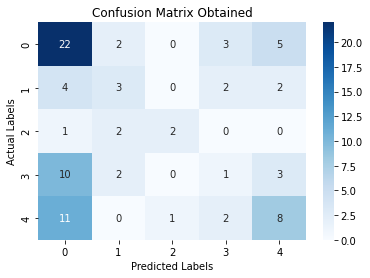

F1-score obtained is  0.3667
Precision obtained is  0.4056
Recall obtained is  0.3573
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.46      0.69      0.55        32
           1       0.33      0.27      0.30        11
           2       0.67      0.40      0.50         5
           3       0.12      0.06      0.08        16
           4       0.44      0.36      0.40        22

    accuracy                           0.42        86
   macro avg       0.41      0.36      0.37        86
weighted avg       0.39      0.42      0.39        86



In [14]:
from sklearn.base import clone
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when AdaBoost is used as Stacking Classifier


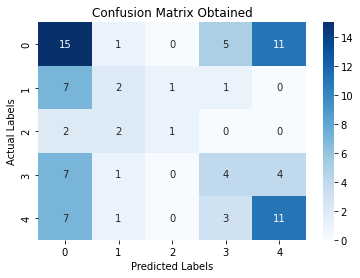

F1-score obtained is  0.3341
Precision obtained is  0.3822
Recall obtained is  0.3201
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.39      0.47      0.43        32
           1       0.29      0.18      0.22        11
           2       0.50      0.20      0.29         5
           3       0.31      0.25      0.28        16
           4       0.42      0.50      0.46        22

    accuracy                           0.38        86
   macro avg       0.38      0.32      0.33        86
weighted avg       0.38      0.38      0.37        86



In [15]:
from sklearn.base import clone
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

[19:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


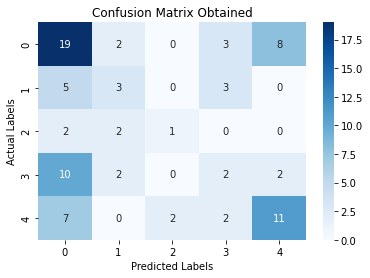

F1-score obtained is  0.3444
Precision obtained is  0.3665
Recall obtained is  0.3383
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.33      0.27      0.30        11
           2       0.33      0.20      0.25         5
           3       0.20      0.12      0.15        16
           4       0.52      0.50      0.51        22

    accuracy                           0.42        86
   macro avg       0.37      0.34      0.34        86
weighted avg       0.40      0.42      0.40        86



In [16]:
from xgboost import XGBClassifier
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


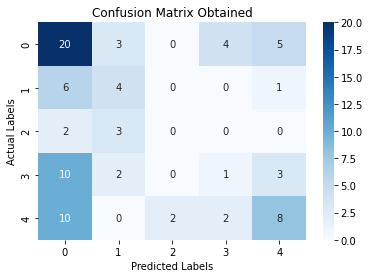

F1-score obtained is  0.269
Precision obtained is  0.2727
Recall obtained is  0.283
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        32
           1       0.33      0.36      0.35        11
           2       0.00      0.00      0.00         5
           3       0.14      0.06      0.09        16
           4       0.47      0.36      0.41        22

    accuracy                           0.38        86
   macro avg       0.27      0.28      0.27        86
weighted avg       0.34      0.38      0.35        86



In [17]:
for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

Results when Decision Tree is used as Stacking Classifier


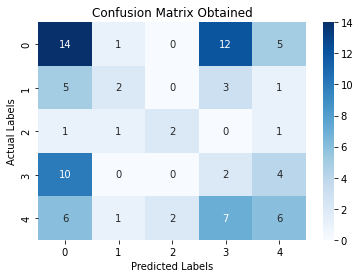

F1-score obtained is  0.3028
Precision obtained is  0.345
Recall obtained is  0.2834
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.39      0.44      0.41        32
           1       0.40      0.18      0.25        11
           2       0.50      0.40      0.44         5
           3       0.08      0.12      0.10        16
           4       0.35      0.27      0.31        22

    accuracy                           0.30        86
   macro avg       0.35      0.28      0.30        86
weighted avg       0.33      0.30      0.31        86



In [18]:
for model,model_name in zip([DecisionTreeClassifier(random_state=rs)],["Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(X_train, y_train)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(X_test)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [19]:
stack_results_table

[['RandomForestClassifier - Stacking Classifier', 0.3667, 0.4056, 0.3573],
 ['AdaBoostClassifier - Stacking Classifier', 0.3341, 0.3822, 0.3201],
 ['XGBClassifier - Stacking Classifier', 0.3444, 0.3665, 0.3383],
 ['GradientBoostingClassifier - Stacking Classifier', 0.269, 0.2727, 0.283],
 ['DecisionTreeClassifier - Stacking Classifier', 0.3028, 0.345, 0.2834]]

In [20]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3667,0.4056,0.3573
1,AdaBoostClassifier - Stacking Classifier,0.3341,0.3822,0.3201
2,XGBClassifier - Stacking Classifier,0.3444,0.3665,0.3383
3,GradientBoostingClassifier - Stacking Classifier,0.2690,0.2727,0.2830
4,DecisionTreeClassifier - Stacking Classifier,0.3028,0.3450,0.2834


{'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
Results when {} is used as Voting Classifier


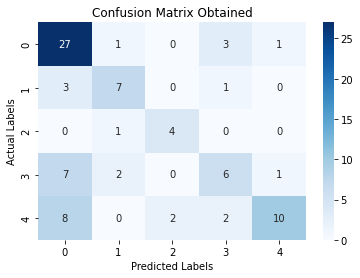

F1-score obtained is  0.6163
Precision obtained is  0.6473
Recall obtained is  0.6219
Classification Report obtained is :
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        32
           1       0.64      0.64      0.64        11
           2       0.67      0.80      0.73         5
           3       0.50      0.38      0.43        16
           4       0.83      0.45      0.59        22

    accuracy                           0.63        86
   macro avg       0.65      0.62      0.62        86
weighted avg       0.65      0.63      0.61        86



In [25]:
stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')
model = voting_classifier
voting_classifier.fit(X_train, y_train)
stack_results[f'{model.__class__.__name__}'+"_yPred"] = voting_classifier.predict(X_test)
stack_list = [f'{model.__class__.__name__}'+" - Voting Classifier"]
print("Results when {} is used as Voting Classifier")
stack_list.extend(print_metrics(y_test, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
stack_results_table.append(stack_list)

In [26]:
stack_results_table

[['RandomForestClassifier - Stacking Classifier', 0.3667, 0.4056, 0.3573],
 ['AdaBoostClassifier - Stacking Classifier', 0.3341, 0.3822, 0.3201],
 ['XGBClassifier - Stacking Classifier', 0.3444, 0.3665, 0.3383],
 ['GradientBoostingClassifier - Stacking Classifier', 0.269, 0.2727, 0.283],
 ['DecisionTreeClassifier - Stacking Classifier', 0.3028, 0.345, 0.2834],
 ['VotingClassifier - Voting Classifier', 0.6163, 0.6473, 0.6219]]

In [27]:
#Tabulating the obtained results and displaying the results by formatting
results_df = pd.DataFrame(stack_results_table,columns = ["Classifier","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(results_df.style.background_gradient(cmap ='Blues'))
formatted_table

,Classifier,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.3667,0.4056,0.3573
1,AdaBoostClassifier - Stacking Classifier,0.3341,0.3822,0.3201
2,XGBClassifier - Stacking Classifier,0.3444,0.3665,0.3383
3,GradientBoostingClassifier - Stacking Classifier,0.2690,0.2727,0.2830
4,DecisionTreeClassifier - Stacking Classifier,0.3028,0.3450,0.2834
5,VotingClassifier - Voting Classifier,0.6163,0.6473,0.6219


In [36]:
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
dt_pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('dt_pca', dt_pca), ('dt', dt)])


knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm = SVC(C=29.763514416313132, random_state=0)
svm_pca = PCA(n_components=76,random_state=rs)
svm_pca_pipeline = Pipeline([('svm_pca', svm_pca), ('svm', svm)])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']


results = cross_validate(estimator=voting_classifier,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

{'dt_pipeline': Pipeline(steps=[('dt_pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('svm_pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [37]:
results

{'fit_time': array([5.32719254, 5.54769945, 5.54714608, 5.17052984, 5.81889439]),
 'score_time': array([0.03998828, 0.03399014, 0.04299212, 0.03798294, 0.03499126]),
 'test_f1_macro': array([0.4470221 , 0.49277076, 0.3979451 , 0.41139063, 0.50385297]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [38]:
import numpy as np
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.45059631395220806
0.04227757352691807


In [39]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
dt_pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('dt_pca', dt_pca), ('dt', dt)])


knn_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

rf_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm = SVC(C=29.763514416313132, random_state=0)
svm_pca = PCA(n_components=76,random_state=rs)
svm_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('svm_pca', svm_pca), ('svm', svm)])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

voting_classifier = VotingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], voting='hard')

_scoring = ['f1_macro']


results = cross_validate(estimator=voting_classifier,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

{'dt_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dt_pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm_pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
0.47845308429818145
0.04498175099518

In [40]:
results

{'fit_time': array([4.90685368, 5.16209126, 5.13127351, 5.28885627, 5.2206831 ]),
 'score_time': array([0.04099059, 0.03700089, 0.03499222, 0.03499222, 0.03301358]),
 'test_f1_macro': array([0.47205256, 0.40557576, 0.46352092, 0.53276869, 0.51834749]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [41]:
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
dt_pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('dt_pca', dt_pca), ('dt', dt)])


knn_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

rf_pca_pipeline = Pipeline(steps=[('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm = SVC(C=29.763514416313132, random_state=0)
svm_pca = PCA(n_components=76,random_state=rs)
svm_pca_pipeline = Pipeline([('svm_pca', svm_pca), ('svm', svm)])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

{'dt_pipeline': Pipeline(steps=[('dt_pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('svm_pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}


In [44]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], GradientBoostingClassifier(random_state = rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

In [45]:
results

{'fit_time': array([31.68302178, 32.41772461, 33.27837133, 32.27609396, 32.20489693]),
 'score_time': array([0.03499317, 0.03299093, 0.03899193, 0.03210473, 0.0339911 ]),
 'test_f1_macro': array([0.325104  , 0.33304774, 0.38118125, 0.48893268, 0.47679894]),
 'train_f1_macro': array([0.49131579, 0.66896404, 0.56800742, 0.53034783, 0.84742213])}

In [46]:
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.40101292263777333
0.06963925431215838


In [47]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], XGBClassifier(objective="binary:logistic", random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

[19:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [49]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], AdaBoostClassifier(random_state = rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.2833078522634364
0.049414348405136324


In [50]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], RandomForestClassifier(random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.4580830385722653
0.046250148727563174


In [51]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], DecisionTreeClassifier(random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.33891981463729104
0.03832936483603022


In [52]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=0)
dt_pca = PCA(n_components=102,random_state=rs)
dt_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('dt_pca', dt_pca), ('dt', dt)])


knn_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca' , PCA(n_components=227,random_state=rs)),
                ('knn',KNeighborsClassifier(n_neighbors=1))])

rf_pca_pipeline = Pipeline(steps=[('scaler',MinMaxScaler()),('adasyn', ADASYN(random_state=0)),('pca',PCA(n_components=48,random_state=rs)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])

svm = SVC(C=29.763514416313132, random_state=0)
svm_pca = PCA(n_components=76,random_state=rs)
svm_pca_pipeline = Pipeline([('scaler',MinMaxScaler()),('svm_pca', svm_pca), ('svm', svm)])

stack_estimators = [dt_pca_pipeline,knn_pca_pipeline,svm_pca_pipeline,rf_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["dt","knn","svm","rf"])}
print(stack_estimators)

stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], XGBClassifier(objective="binary:logistic", random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

print("="*50)

stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], AdaBoostClassifier(random_state = rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

print("="*50)

stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], RandomForestClassifier(random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

print("="*50)

stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], DecisionTreeClassifier(random_state=rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

{'dt_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dt_pca', PCA(n_components=102, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10, random_state=0))]), 'knn_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=227, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))]), 'svm_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm_pca', PCA(n_components=76, random_state=0)),
                ('svm', SVC(C=29.763514416313132, random_state=0))]), 'rf_pipeline': Pipeline(steps=[('scaler', MinMaxScaler()), ('adasyn', ADASYN(random_state=0)),
                ('pca', PCA(n_components=48, random_state=0)),
                ('rf', RandomForestClassifier(max_depth=15, random_state=0))])}
[20:05:44] WARNING: C:/Users/Adminis

In [53]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], GradientBoostingClassifier(random_state = rs))

_scoring = ['f1_macro']

results = cross_validate(estimator=stacking,
                               X=data_df_features,
                               y=data_df_class,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

In [54]:
results

{'fit_time': array([32.4416883 , 33.02466273, 38.44544244, 31.30073047, 30.77874041]),
 'score_time': array([0.03599334, 0.07952309, 0.04198813, 0.03898811, 0.03699565]),
 'test_f1_macro': array([0.41524016, 0.38956867, 0.44012294, 0.44846206, 0.50642534]),
 'train_f1_macro': array([0.7864041 , 0.79807387, 0.62919394, 0.58765129, 0.68763879])}

In [55]:
print(np.mean(results["test_f1_macro"]))
print(np.std(results["test_f1_macro"]))

0.43996383343271595
0.03909043278635177
